In [3]:
import numpy as np
import matplotlib.pyplot as plt
from contextlib import contextmanager

@contextmanager
def prf_plot(fig, subplot):
    ax = fig.add_subplot(subplot)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True,linestyle='--')
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')
    
    f_scores = np.linspace(0.1, 0.9, num = 9)
    for i in range(9):
        p = np.linspace(0, 1,10000)
        r = f_scores[i] * p / (2 * p - f_scores[i])
        curve = ax.plot(p[r>=0], r[r>=0], color = 'gray', alpha = 0.4)
        plt.text(1.01, r[-1], 'F={:0.1f}'.format((i+1)*0.1), color = 'gray')
    
    yield ax

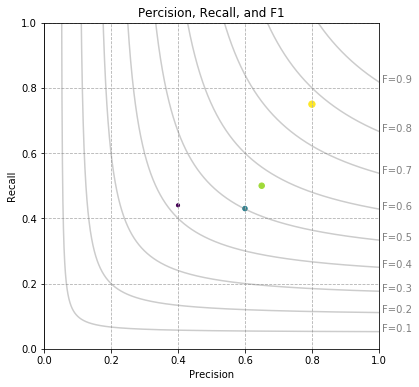

In [4]:
fig = plt.figure(figsize=(6, 6))

with prf_plot(fig, 111) as ax:
    
    ax.scatter(x = [0.4, 0.6, 0.65, 0.8],
              y = [0.44, 0.43, 0.5, 0.75],
              s = [10, 20, 30, 40],
              c = [0.3, 0.6, 0.9, 1.0],
              cmap = 'viridis')
    
    ax.set_title('Percision, Recall, and F1')